<a href="https://colab.research.google.com/github/natewoods1221/Data-Science-1002/blob/main/Assignments/12_REALREALCAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capital Asset Pricing Model (CAPM)

### Assignment due Monday 22 April at noon

---

### Objectives

This assignment is primarily meant to refresh your numpy and pandas skills.  
Technical objectives are discussed below.  

- All the usual rules apply:  you may work together (groups of at most 3), make sure all names are easy to find at the top of the submission, submit the link to your working colab notebook


### Background

In finance, CAPM is a single-factor regression model used for analyzing (and predicting) excess stock returns. There are better, more accurate models, but it has its uses. For example, the *market beta* is a useful output which has something to do with the risk of particular investments.

1.  Read [this brief synopsis](https://en.wikipedia.org/wiki/Capital_asset_pricing_model) of CAPM.


Don't worry if you don't understand all the terminology.
Look for a moment at the main formula (in the "Formula" section).  For us that formula will look like this:

\begin{aligned}
E(R_A) = R_f + \beta_A (E(R_{SP}) - R_f)
\end{aligned}

Some notes on the symbols in this formula:
- The formula is used to estimate $E(R_A)$.  The $E$ here stands for the expected value, and $R_A$ is the rate of return of the investment $A$.
- To use this formula, you therefore need to know the values of the other variables.
- The variable $R_f$ is the "risk-free rate," which is the amount of return you can get on an investment that has zero risk, like say a bank account.
This quantity changes over time but for our purposes we can treat it as a constant.  It is hard-coded into the code below.  Make sure you see where this variable occurs in the formula above.
- In this assignment the variable $R_{SP}$ is a measure of the rate of return of the overall market.  (The $E$ on the right side also means expected value.)
- The variable $\beta_A$ measures something about the relative risk of the investment A, relative to the overall market.  The technical objective of this assignment will be to compute $\beta_A$ below, and then to examine how sensitive it is to the specific data.
- The value you get for $\beta_A$ will be a number.  If it is greater than 1, it means (*very roughly*) that the investment A is more volatile than the overall market.  If it is less than 1, it means that the investment is less volatile than the overall market.  But **do not take this too seriously!** In particular see all the caveats at the wikipedia page.
- The A investment in our example is an individual stock (Apple).



2.  Load the packages and data.  (Note that the following code chunk also hard-codes the constant $R_f$.)  
The data lives in the file `capm_market_data` in the `data` folder on the `GitHub` site.

In [16]:
# load numpy and pandas packages
import numpy as np
import pandas as pd

# get data
df = pd.read_csv('/content/capm_market_data (1).csv')
print(df.head())

# risk-free Treasury rate
R_f = 0.0175 / 252

         date  spy_adj_close  aapl_adj_close
0  2020-01-02     321.555786      298.829956
1  2020-01-03     319.120911      295.924713
2  2020-01-06     320.338379      298.282715
3  2020-01-07     319.437653      296.879883
4  2020-01-08     321.140106      301.655548


3.  Look at some records.  
SPY is something that mirrors the S&P 500 ("the market").  
AAPL is the code for Apple stock.  
The values are closing prices, adjusted for splits and dividends.

4.  Drop the date column

In [17]:
df.drop(columns=['date'], inplace=True)
print(df.head())


   spy_adj_close  aapl_adj_close
0     321.555786      298.829956
1     319.120911      295.924713
2     320.338379      298.282715
3     319.437653      296.879883
4     321.140106      301.655548


5.  Compute daily returns (percentage changes in price) for both SPY and AAPL.
(Be sure to drop the first row of NaN.)  
Hint: pandas has functions to easily do this.  
Print the first 5 rows of returns.


In [30]:
spy_returns = df['spy_adj_close'].pct_change()
aapl_returns = df['aapl_adj_close'].pct_change()

spy_returns = spy_returns.dropna()
aapl_returns = aapl_returns.dropna()

print("SPY Returns:")
print(spy_returns.head())

print("AAPL Returns:")
print(aapl_returns.head())

SPY Returns:
1   -0.007572
2    0.003815
3   -0.002812
4    0.005330
5    0.006781
Name: spy_adj_close, dtype: float64
AAPL Returns:
1   -0.009722
2    0.007968
3   -0.004703
4    0.016086
5    0.021241
Name: aapl_adj_close, dtype: float64


6.  Save the SPY and AAPL returns into separate numpy arrays.  
Print the first five values from each of the two arrays.


In [19]:
spy_returns_array = spy_returns.to_numpy()
aapl_returns_array = aapl_returns.to_numpy()

print("First five values of SPY returns array:")
print(spy_returns_array[:5])

print("\nFirst five values of AAPL returns array:")
print(aapl_returns_array[:5])

First five values of SPY returns array:
[-0.00757217  0.00381507 -0.0028118   0.00532953  0.00678059]

First five values of AAPL returns array:
[-0.00972206  0.00796825 -0.00470303  0.01608619  0.02124092]


7.  Make arrays (one for SPY, one for AAPL) containing the *excess* returns by subtracting the constant $R_f$ from the returns.  
(Recall that $R_f$ is the "risk-free rate" meaning essentially that you could earn this much in interest if you didn't invest in anything.)  
Print the LAST five excess returns from both SPY and AAPL numpy arrays.

In [25]:
spy_excess_returns = spy_returns_array - Rf
aapl_excess_returns = aapl_returns_array - Rf

print("Last five excess returns of SPY:")
print(spy_excess_returns[-5:])

print("\nLast five excess returns of AAPL:")
print(aapl_excess_returns[-5:])

Last five excess returns of SPY:
[-0.02569292 -0.00978945 -0.02865896 -0.00704098 -0.01081277]

Last five excess returns of AAPL:
[-0.01569968 -0.01825074 -0.02461319 -0.00345158 -0.01312268]


8. Make a scatterplot with SPY excess returns on the $x$-axis and AAPL excess returns on the $y$-axis.  
If you need it, here is the [Matplotlib documentation]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

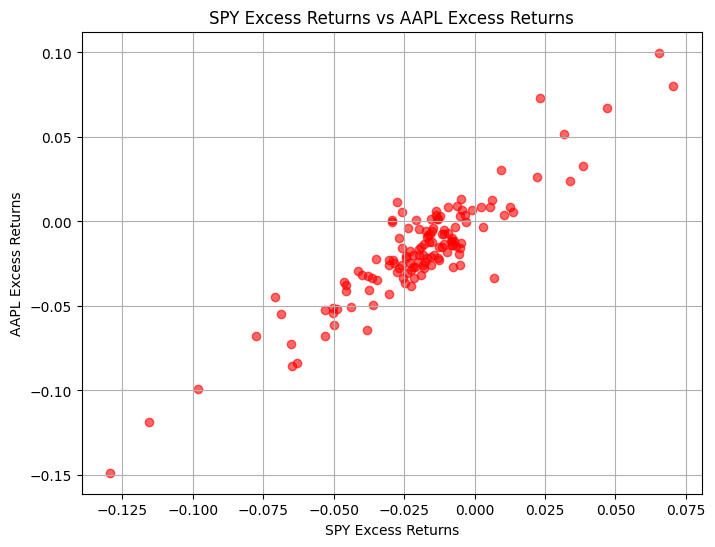

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(spy_excess_returns, aapl_excess_returns, color='red', alpha=0.6)


plt.title('SPY Excess Returns vs AAPL Excess Returns')
plt.xlabel('SPY Excess Returns')
plt.ylabel('AAPL Excess Returns')


plt.grid(True)


plt.show()

The value of $\beta_A$ is computed from the arrays you built in problem 7, via a formula that uses some statistical functions called the "variance" and the "covariance."

Any individual 1-d array of numbers has a variance, which you can compute using `numpy`'s function `var()` (documented [here](https://numpy.org/doc/stable/reference/generated/numpy.var.html)).  This is a number.

If you have two 1-d arrays of the same length, they collectively have something called a covariance which `numpy` also can compute using `cov()` (documented [here](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)).

The covariance is also a number, but look at what happens when you send two 1-d arrays to `cov()`: it returns a $2\times 2$ matrix.  (Try it!)  The covariance we are looking for is the number that lives in both the top right and the bottom left of this matrix.  (Those two numbers should be the same.)  The top left and bottom right entries of the covariance matrix also have meaning, but we don't need them.



9. Use `numpy` functions as described above to compute the estimate of $\beta_A$, using the following formula:  
\begin{aligned} \beta_A= \frac{ \text{cov}(A,SP) }{ \text{var}(SP) } \end{aligned}
In our context, A will be the 1-d array you made in problem 7 for AAPL, and SP will be the 1-d array you made for SPY.

In [27]:
covariance_matrix = np.cov(aapl_excess_returns, spy_excess_returns)


covariance = covariance_matrix[0, 1]


spy_variance = np.var(spy_excess_returns)

beta_A = covariance / spy_variance

print("Estimated beta_A:", beta_A)

Estimated beta_A: 1.095617264419722


You should have found that the beta estimate is greater than one.  
This means that the volatility of AAPL stock, given the data, and according to this particular (flawed) model,
is higher than the volatility of the S&P 500.

Bonus:  Is this something you can see on the plot you made?



Finally, let's look at how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

This is called *jackknifing*.



10. Write a function called `beta_sensitivity()` with these specs:

- take numpy arrays `x` and `y` as inputs
- outputs a list of tuples, so that each tuple contains (observation row dropped, beta estimate)

Hint: **np.delete(x, i).reshape(-1,1)** will delete observation i from array x, and make it a column vector

In [28]:
def beta_sensitivity(x, y):
    sensitivity = []
    n = len(x)

    original_covariance = np.cov(x, y)[0, 1]
    original_variance = np.var(x)
    original_beta = original_covariance / original_variance


    for i in range(n):

        x_modified = np.delete(x, i).reshape(-1, 1)
        y_modified = np.delete(y, i)


        covariance = np.cov(x_modified.flatten(), y_modified)[0, 1]
        variance = np.var(x_modified.flatten())
        beta_estimate = covariance / variance


        sensitivity.append((i, beta_estimate))

    return sensitivity


sensitivity = beta_sensitivity(spy_excess_returns, aapl_excess_returns)
print(sensitivity)

[(0, 1.0953845500804957), (1, 1.095618983478552), (2, 1.095555855660709), (3, 1.0952630299046582), (4, 1.0949054764016837), (5, 1.09578886233597), (6, 1.0948925461451775), (7, 1.0954060132439707), (8, 1.0958504733995793), (9, 1.0955676643922245), (10, 1.095522630756034), (11, 1.0955167293082573), (12, 1.0956827193376533), (13, 1.095667729356666), (14, 1.096125081829731), (15, 1.09329618047602), (16, 1.094143130486898), (17, 1.095923435584647), (18, 1.0958882306772804), (19, 1.090571966269314), (20, 1.096617364613201), (21, 1.0934857099235793), (22, 1.0964285556445765), (23, 1.095497389928883), (24, 1.0950973493407097), (25, 1.0960788561048567), (26, 1.0958188603863006), (27, 1.0947671044525782), (28, 1.0955591643761426), (29, 1.0957246092807273), (30, 1.095143637017769), (31, 1.0953547263031709), (32, 1.095314423771075), (33, 1.094190108859983), (34, 1.0909525280287262), (35, 1.0947126657767698), (36, 1.0964195583594856), (37, 1.0868133375174482), (38, 1.0957672244521741), (39, 1.07593

11. Call `beta_sensitivity()` on the arrays A and SP from earlier and print the first ten tuples of output.

In [29]:
sensitivity = beta_sensitivity(aapl_excess_returns, spy_excess_returns)

print("First ten tuples of output:")
for i in range(10):
    print(sensitivity[i])

First ten tuples of output:
(0, 0.7780271291138472)
(1, 0.7779227611028061)
(2, 0.7780186010891412)
(3, 0.7784391413984394)
(4, 0.7789941470436158)
(5, 0.7778864515205234)
(6, 0.7790012519236995)
(7, 0.7791198704459661)
(8, 0.7782475196059937)
(9, 0.7778763569006099)
